# Vizualize And Analyze the Data 
File will analyze the means across different contexts and across different models including different influence of face saliency. Provides with plots of the results and saves them into chosen destination.

You have to pick a metric and provide a string for saving the files.

In [1]:
import os
os.chdir('../saliency_model/')

import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib

import pandas as pd
import seaborn as sns
from glob import glob

matplotlib.rcParams.update({'font.size': 15})

### Pick Metric
NSS, SIM, IG, AUC

In [2]:
plot_metric = 'SIM'

In [3]:
# pick directory
save_dir ='../report/plots/'

In [4]:
os.chdir('../results/')
glob('*.p')

['19-02-01_results_face_05.p',
 '19-02-01_results_plain_models.p',
 '19-02-01_results_face_03.p',
 '19-02-01_results_over_baseline_faces_07.p',
 '19-02-01_results_face_07.p',
 '19-01-31_results.p',
 '19-02-01_results_over_baseline_faces_05.p',
 '19-02-01_results_over_baseline_faces_03.p']

## Pick the Dataset and Load Required Data

In [5]:
(summary, context, model, metric) = pickle.load(open( '19-02-01_results_plain_models.p', "rb"))

In [6]:
print(np.shape(summary))
print(context)
print(model)
print(metric)

(6, 9, 4)
['all', 'person', 'no person', 'animal', 'electronic', 'sports']
['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun', 'dg', 'faces']
['nss', 'sim', 'ig', 'auc']


In [7]:
(summary_f03, context_f03, model_f03, metric_f03) = pickle.load(open( '19-02-01_results_face_03.p', "rb"))
(summary_f05, context_f05, model_f05, metric_f05) = pickle.load(open( '19-02-01_results_face_05.p', "rb"))
(summary_f07, context_f07, model_f07, metric_f07) = pickle.load(open( '19-02-01_results_face_07.p', "rb"))

#### Vizualize the inside of one of the models

In [8]:
model_f03

['aim_face_03',
 'cas_face_03',
 'covsal_face_03',
 'gbvs_face_03',
 'icf_face_03',
 'ik_face_03',
 'sun_face_03']

## Data Loading

### Get ID of the Metric

In [9]:
if plot_metric == 'NSS':
    metric_id = 0
elif plot_metric == 'SIM':
    metric_id = 1
elif plot_metric == 'IG':
    metric_id = 2
elif plot_metric == 'AUC':
    metric_id = 3
else:
    raise ValueError('Wrong metric name provided.')
    
metric_id

0

### Load the scores

In [10]:
scores = summary[:,:,metric_id]
f03_scores = summary_f03[:,:,metric_id]
f05_scores = summary_f05[:,:,metric_id]
f07_scores = summary_f07[:,:,metric_id]

## Change scores into DataFrames
### No Faces Data Frame

In [11]:
df = pd.DataFrame(data=scores, columns=model, index=context)
df.columns.name='models'
df.index.name='context'

df = df.transpose()
df

context,all,person,no person,animal,electronic,sports
models,,,,,,
aim,0.695415,0.750022,0.606893,0.634023,0.612062,0.904362
cas,0.699232,0.751214,0.614966,0.598501,0.602891,0.916443
covsal,0.808601,0.858434,0.727820,0.799353,0.676901,0.994663
gbvs,0.930722,0.981991,0.847613,0.866363,0.818153,1.175780
icf,0.750453,0.798573,0.672449,0.703392,0.680108,0.827598
ik,0.609094,0.656248,0.532654,0.570222,0.548264,0.825519
sun,0.381636,0.374716,0.392854,0.231857,0.342912,0.381378
dg,1.007740,1.091062,0.872670,1.028912,0.857675,1.201838
faces,0.948514,0.945107,1.282341,1.248569,0.946717,0.878707


#### Separate Faces From the rest of the results

In [12]:
faces = df.loc['faces']
df = df.loc[['aim','cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun', 'dg']]

#### Get Mean Values across Contexts and Models

In [13]:
df['mean context'] = df.mean(axis=1)
df = df.transpose()
df['mean model'] = df.mean(axis=1)
df = df.transpose()
df

context,all,person,no person,animal,electronic,sports,mean context
models,,,,,,,
aim,0.695415,0.750022,0.606893,0.634023,0.612062,0.904362,0.700463
cas,0.699232,0.751214,0.614966,0.598501,0.602891,0.916443,0.697208
covsal,0.808601,0.858434,0.727820,0.799353,0.676901,0.994663,0.810962
gbvs,0.930722,0.981991,0.847613,0.866363,0.818153,1.175780,0.936770
icf,0.750453,0.798573,0.672449,0.703392,0.680108,0.827598,0.738762
ik,0.609094,0.656248,0.532654,0.570222,0.548264,0.825519,0.623667
sun,0.381636,0.374716,0.392854,0.231857,0.342912,0.381378,0.350892
dg,1.007740,1.091062,0.872670,1.028912,0.857675,1.201838,1.009983
mean model,0.735362,0.782783,0.658490,0.679078,0.642371,0.903448,0.733588


In [14]:
df_mean_model = df.loc['mean model']
df_mean_context = df.transpose().loc['mean context']

### Faces with $\alpha$ = 0.3

In [15]:
df_f03 = pd.DataFrame(data=f03_scores, columns=model_f03, index=context_f03)
df_f03.columns.name='models'
df_f03.index.name='context'

# Rename columns of the face plot
col = {'aim_face_03':'aim', 'cas_face_03':'cas', 'covsal_face_03':'covsal', 'gbvs_face_03':'gbvs',
       'icf_face_03':'icf', 'ik_10_face_03':'ik_10', 'sun_face_03':'sun', 'ik_face_03':'ik'}
df_f03 = df_f03.rename(index=str, columns=col).transpose()

df_f03

context,all,person,no person,animal,electronic,sports
models,,,,,,
aim,0.726771,0.802703,0.603681,0.646115,0.665118,0.927426
cas,0.724031,0.794266,0.609574,0.608964,0.641751,0.933882
covsal,0.844614,0.915541,0.729637,0.814085,0.733162,1.021776
gbvs,0.952308,1.017286,0.846974,0.877877,0.851408,1.190304
icf,0.776991,0.841105,0.673060,0.717625,0.714424,0.848944
ik,0.644718,0.714655,0.531347,0.582755,0.604659,0.849906
sun,0.427048,0.450776,0.388583,0.244370,0.416806,0.412040


#### Get Mean Values across Contexts and Models

In [16]:
df_f03['mean context'] = df_f03.mean(axis=1)
df_f03 = df_f03.transpose()
df_f03['mean model'] = df_f03.mean(axis=1)
df_f03 = df_f03.transpose()
df_f03

context,all,person,no person,animal,electronic,sports,mean context
models,,,,,,,
aim,0.726771,0.802703,0.603681,0.646115,0.665118,0.927426,0.728636
cas,0.724031,0.794266,0.609574,0.608964,0.641751,0.933882,0.718745
covsal,0.844614,0.915541,0.729637,0.814085,0.733162,1.021776,0.843136
gbvs,0.952308,1.017286,0.846974,0.877877,0.851408,1.190304,0.956026
icf,0.776991,0.841105,0.673060,0.717625,0.714424,0.848944,0.762025
ik,0.644718,0.714655,0.531347,0.582755,0.604659,0.849906,0.654673
sun,0.427048,0.450776,0.388583,0.244370,0.416806,0.412040,0.389937
mean model,0.728069,0.790905,0.626122,0.641684,0.661047,0.883468,0.721883


In [17]:
df_f03_mean_model = df_f03.loc['mean model']
df_f03_mean_context = df_f03.transpose().loc['mean context']

### Faces with $\alpha$ = 0.5

In [18]:
df_f05 = pd.DataFrame(data=f05_scores, columns=model_f05, index=context_f05)
df_f05.columns.name='models'
df_f05.index.name='context'

# Rename columns of the face plot
col = {'aim_face_05':'aim', 'cas_face_05':'cas', 'covsal_face_05':'covsal', 'gbvs_face_05':'gbvs',
       'icf_face_05':'icf', 'ik_10_face_05':'ik_10', 'sun_face_05':'sun', 'ik_face_05':'ik'}
df_f05 = df_f05.rename(index=str, columns=col).transpose()

df_f05

context,all,person,no person,animal,electronic,sports
models,,,,,,
aim,0.751993,0.843119,0.604273,0.655431,0.702635,0.946604
cas,0.749544,0.834213,0.612289,0.620550,0.683569,0.948357
covsal,0.871282,0.957498,0.731522,0.826974,0.773809,1.043873
gbvs,0.969970,1.045364,0.847754,0.887882,0.877220,1.199123
icf,0.794886,0.869942,0.673215,0.727519,0.735561,0.859675
ik,0.672653,0.759661,0.531609,0.593539,0.646299,0.865729
sun,0.466713,0.514570,0.389136,0.263813,0.473598,0.446995


#### Get Mean Values across Contexts and Models

In [19]:
df_f05['mean context'] = df_f05.mean(axis=1)
df_f05 = df_f05.transpose()
df_f05['mean model'] = df_f05.mean(axis=1)
df_f05 = df_f05.transpose()
df_f05

context,all,person,no person,animal,electronic,sports,mean context
models,,,,,,,
aim,0.751993,0.843119,0.604273,0.655431,0.702635,0.946604,0.750676
cas,0.749544,0.834213,0.612289,0.620550,0.683569,0.948357,0.741420
covsal,0.871282,0.957498,0.731522,0.826974,0.773809,1.043873,0.867493
gbvs,0.969970,1.045364,0.847754,0.887882,0.877220,1.199123,0.971219
icf,0.794886,0.869942,0.673215,0.727519,0.735561,0.859675,0.776800
ik,0.672653,0.759661,0.531609,0.593539,0.646299,0.865729,0.678249
sun,0.466713,0.514570,0.389136,0.263813,0.473598,0.446995,0.425804
mean model,0.753863,0.832052,0.627114,0.653673,0.698956,0.901479,0.744523


In [20]:
df_f05_mean_model = df_f05.loc['mean model']
df_f05_mean_context = df_f05.transpose().loc['mean context']

### Faces with $\alpha$ = 0.7

In [21]:
df_f07 = pd.DataFrame(data=f07_scores, columns=model_f07, index=context_f07)
df_f07.columns.name='models'
df_f07.index.name='context'

# Rename columns of the face plot
col = {'aim_face_07':'aim', 'cas_face_07':'cas', 'covsal_face_07':'covsal', 'gbvs_face_07':'gbvs',
       'icf_face_07':'icf', 'ik_10_face_07':'ik_10', 'sun_face_07':'sun', 'ik_face_07':'ik'}
df_f07 = df_f07.rename(index=str, columns=col).transpose()

df_f07

context,all,person,no person,animal,electronic,sports
models,,,,,,
aim,0.765826,0.865497,0.604252,0.656729,0.719146,0.954633
cas,0.771458,0.869309,0.612838,0.629839,0.715841,0.957294
covsal,0.882585,0.975002,0.732773,0.834294,0.790723,1.055998
gbvs,0.979199,1.059780,0.848574,0.896216,0.890499,1.195571
icf,0.803146,0.883573,0.672770,0.732652,0.741859,0.858524
ik,0.689479,0.787104,0.531223,0.601158,0.667458,0.872764
sun,0.496638,0.563304,0.388569,0.282352,0.512007,0.480026


In [22]:
df_f07['mean context'] = df_f07.mean(axis=1)
df_f07 = df_f07.transpose()
df_f07['mean model'] = df_f07.mean(axis=1)
df_f07 = df_f07.transpose()
df_f07

context,all,person,no person,animal,electronic,sports,mean context
models,,,,,,,
aim,0.765826,0.865497,0.604252,0.656729,0.719146,0.954633,0.761014
cas,0.771458,0.869309,0.612838,0.629839,0.715841,0.957294,0.759430
covsal,0.882585,0.975002,0.732773,0.834294,0.790723,1.055998,0.878562
gbvs,0.979199,1.059780,0.848574,0.896216,0.890499,1.195571,0.978307
icf,0.803146,0.883573,0.672770,0.732652,0.741859,0.858524,0.782087
ik,0.689479,0.787104,0.531223,0.601158,0.667458,0.872764,0.691531
sun,0.496638,0.563304,0.388569,0.282352,0.512007,0.480026,0.453816
mean model,0.769762,0.857653,0.627286,0.661891,0.719648,0.910687,0.757821


In [23]:
df_f07_mean_model = df_f07.loc['mean model']
df_f07_mean_context = df_f07.transpose().loc['mean context']

### Create Mean Matrices

In [24]:
mean_models = pd.DataFrame([df_mean_model, df_f03_mean_model, df_f05_mean_model, df_f07_mean_model], index=[0,0.3,0.5,0.7])

mean_models = mean_models.transpose()
mean_models = mean_models.loc[['all', 'person', 'no person', 'animal', 'electronic', 'sports']]
mean_models

,0.0,0.3,0.5,0.7
context,,,,
all,0.735362,0.728069,0.753863,0.769762
person,0.782783,0.790905,0.832052,0.857653
no person,0.658490,0.626122,0.627114,0.627286
animal,0.679078,0.641684,0.653673,0.661891
electronic,0.642371,0.661047,0.698956,0.719648
sports,0.903448,0.883468,0.901479,0.910687


In [25]:
mean_contexts = pd.DataFrame([df_mean_context, df_f03_mean_context, df_f05_mean_context, df_f07_mean_context], index=[0,0.3,0.5,0.7])

mean_contexts = mean_contexts.transpose()
mean_contexts = mean_contexts.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]
mean_contexts

,0.0,0.3,0.5,0.7
aim,0.700463,0.728636,0.750676,0.761014
cas,0.697208,0.718745,0.741420,0.759430
covsal,0.810962,0.843136,0.867493,0.878562
gbvs,0.936770,0.956026,0.971219,0.978307
icf,0.738762,0.762025,0.776800,0.782087
ik,0.623667,0.654673,0.678249,0.691531
sun,0.350892,0.389937,0.425804,0.453816


## Visualization of The Results

### Data Prep For separate Vizualization

In [26]:
df0 = df.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]
df0 = df0.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

df0_mean_context = df.transpose().loc[['mean context']]
df0_mean_context = df0_mean_context.transpose().loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']].transpose()

df0_mean_model = df.loc[['mean model']]
df0_mean_model = df0_mean_model.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

In [27]:
df0_f03 = df_f03.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]
df0_f03 = df0_f03.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

df0_mean_context_f03 = df_f03.transpose().loc[['mean context']]
df0_mean_context_f03 = df0_mean_context_f03.transpose().loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']].transpose()

df0_mean_model_f03 = df_f03.loc[['mean model']]
df0_mean_model_f03 = df0_mean_model_f03.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

In [28]:
df0_f05 = df_f05.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]
df0_f05 = df0_f05.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

df0_mean_context_f05 = df_f05.transpose().loc[['mean context']]
df0_mean_context_f05 = df0_mean_context_f05.transpose().loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']].transpose()

df0_mean_model_f05 = df_f05.loc[['mean model']]
df0_mean_model_f05 = df0_mean_model_f05.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

In [29]:
df0_f07 = df_f07.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]
df0_f06 = df0_f07.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

df0_mean_context_f07 = df_f07.transpose().loc[['mean context']]
df0_mean_context_f07 = df0_mean_context_f07.transpose().loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']].transpose()

df0_mean_model_f07 = df_f07.loc[['mean model']]
df0_mean_model_f07 = df0_mean_model_f07.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

### Make the Big Fancy Plot

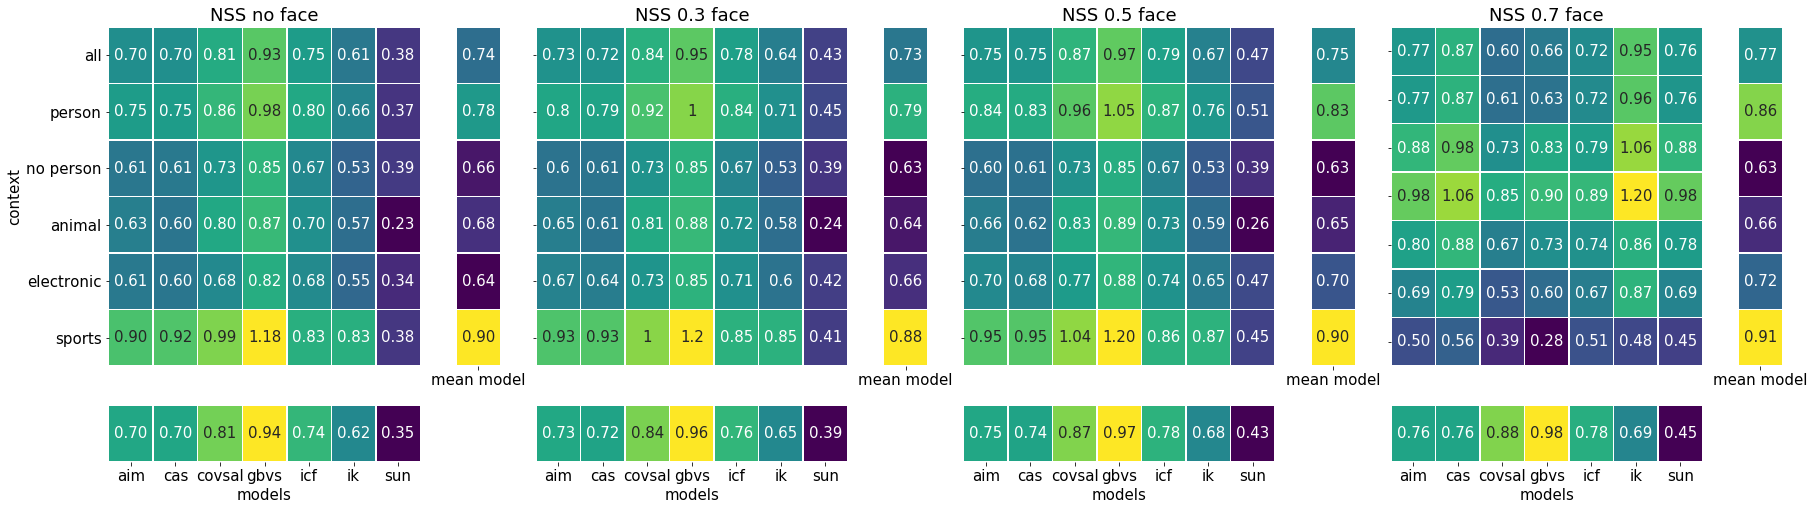

In [30]:
matplotlib.rcParams.update({'font.size': 15})

fig, ax = plt.subplots(figsize=(30,8))
gs = gridspec.GridSpec(2, 8,
                       width_ratios=[7, 1, 7, 1, 7, 1, 7, 1],
                       height_ratios=[6, 1]
                       )

ax01 = plt.subplot(gs[0])
ax02 = plt.subplot(gs[1])
ax03 = plt.subplot(gs[8])

ax11 = plt.subplot(gs[2])
ax12 = plt.subplot(gs[3])
ax13 = plt.subplot(gs[10])

ax21 = plt.subplot(gs[4])
ax22 = plt.subplot(gs[5])
ax23 = plt.subplot(gs[12])

ax31 = plt.subplot(gs[6])
ax32 = plt.subplot(gs[7])
ax33 = plt.subplot(gs[14])

im = sns.heatmap(df0, annot=True, linewidths=.5, ax=ax01, cmap='viridis', cbar=False, xticklabels='', fmt='.2f');
sns.heatmap(df0_mean_model, annot=True, linewidths=.5, ax=ax02, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');
sns.heatmap(df0_mean_context, annot=True, linewidths=.5, ax=ax03, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');

sns.heatmap(df0_f03, annot=True, linewidths=.5, ax=ax11, cmap='viridis', cbar=False, xticklabels='');
sns.heatmap(df0_mean_model_f03, annot=True, linewidths=.5, ax=ax12, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');
sns.heatmap(df0_mean_context_f03, annot=True, linewidths=.5, ax=ax13, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');

sns.heatmap(df0_f05, annot=True, linewidths=.5, ax=ax21, cmap='viridis', cbar=False, xticklabels='', fmt='.2f');
sns.heatmap(df0_mean_model_f05, annot=True, linewidths=.5, ax=ax22, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');
sns.heatmap(df0_mean_context_f05, annot=True, linewidths=.5, ax=ax23, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');

sns.heatmap(df0_f07, annot=True, linewidths=.5, ax=ax31, cmap='viridis', cbar=False, xticklabels='', fmt='.2f');
sns.heatmap(df0_mean_model_f07, annot=True, linewidths=.5, ax=ax32, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');
sns.heatmap(df0_mean_context_f07, annot=True, linewidths=.5, ax=ax33, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');

ax01.set_xlabel('');
ax02.set_ylabel('');
ax02.set_xlabel('');
ax03.set_ylabel('');

ax11.set_yticklabels('');
ax11.set_xlabel('');
ax11.set_ylabel('')
ax12.set_ylabel('');
ax12.set_xlabel('');
ax13.set_ylabel('');

ax21.set_yticklabels('');
ax21.set_xlabel('');
ax21.set_ylabel('')
ax22.set_ylabel('');
ax22.set_xlabel('');
ax23.set_ylabel('');

ax31.set_yticklabels('');
ax31.set_xlabel('');
ax31.set_ylabel('')
ax32.set_ylabel('');
ax32.set_xlabel('');
ax33.set_ylabel('');

ax01.set_title('{} no face'.format(plot_metric));
ax11.set_title('{} 0.3 face'.format(plot_metric));
ax21.set_title('{} 0.5 face'.format(plot_metric));
ax31.set_title('{} 0.7 face'.format(plot_metric));
plt.savefig(save_dir+'{}_sep_with_mean.jpg'.format(plot_metric), bbox_inches='tight', pad_inches=0)

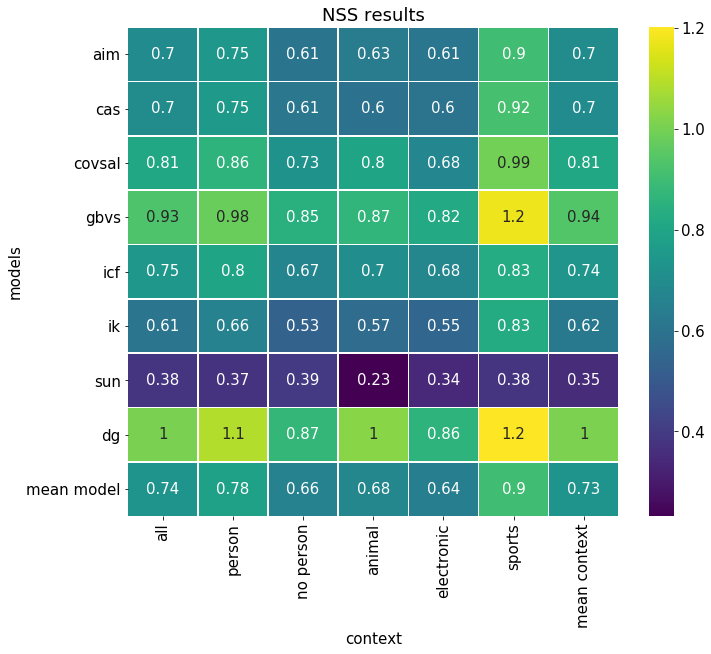

In [31]:
matplotlib.rcParams.update({'font.size': 15})

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df, annot=True, linewidths=.5, ax=ax, cmap='viridis');
plt.title('{} results'.format(plot_metric));

plt.savefig(save_dir+'{}_all.jpg'.format(plot_metric), bbox_inches='tight', pad_inches=0)

## Visualization of The Means

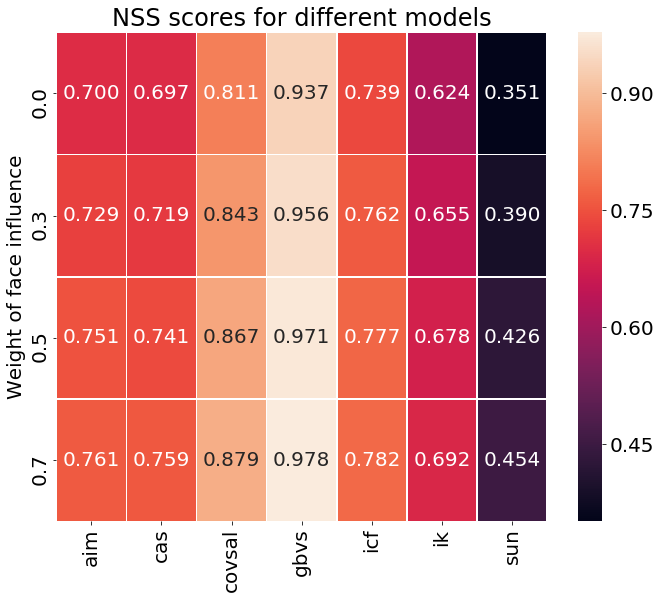

In [32]:
matplotlib.rcParams.update({'font.size': 20})

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(mean_contexts.transpose(), annot=True, linewidths=.5, ax=ax,fmt='.3f');
plt.ylabel('Weight of face influence')
plt.title('{} scores for different models'.format(plot_metric));
plt.xticks(rotation=90)
plt.savefig(save_dir+'{}_performance_mean_contexts.jpg'.format(plot_metric), bbox_inches='tight', pad_inches=0)

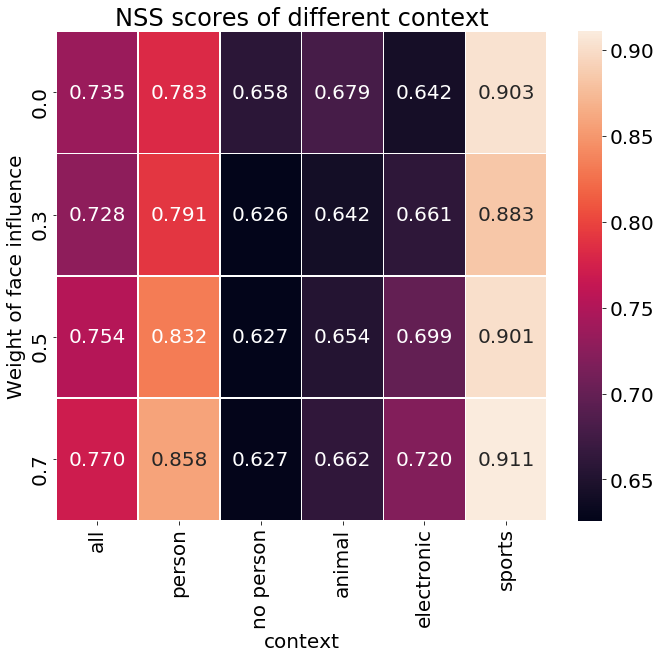

In [33]:
f, ax = plt.subplots(figsize=(11, 9))
matplotlib.rcParams.update({'font.size': 20})

sns.heatmap(mean_models.transpose(), annot=True, linewidths=.5, ax=ax,fmt='.3f');
plt.ylabel('Weight of face influence')
plt.title('{} scores of different context'.format(plot_metric));

plt.savefig(save_dir+'{}_performance_mean_models.jpg'.format(plot_metric), bbox_inches='tight', pad_inches=0)

## Calculate The Relative Error

In [34]:
df1 = df.loc[['aim','cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun', 'mean model']]

In [35]:
df_diff_f03 = ((df_f03 - df1) / df1)*100
df_diff_f05 = ((df_f05 - df1) / df1)*100
df_diff_f07 = ((df_f07 - df1) / df1)*100

#### Get mean of models and mean of contexts in diff out

#### Diff Models (analyse across contexts)

In [36]:
mean_model_diff_f03 = df_diff_f03.loc['mean model']
mean_model_diff_f05 = df_diff_f05.loc['mean model']
mean_model_diff_f07 = df_diff_f07.loc['mean model']

mean_models_diff = pd.DataFrame([mean_model_diff_f03, 
                            mean_model_diff_f05,
                            mean_model_diff_f07], index=[0.3,0.5,0.7])

mean_models_diff = mean_models_diff.transpose()
mean_models_diff

,0.3,0.5,0.7
context,,,
all,-0.991753,2.515950,4.677967
person,1.037580,6.294177,9.564608
no person,-4.915414,-4.764817,-4.738752
animal,-5.506515,-3.741123,-2.530874
electronic,2.907390,8.808827,12.029936
sports,-2.211442,-0.217849,0.801322
mean context,-1.595695,1.490555,3.303296


#### Diff Contexts (analyse across models)

In [37]:
mean_context_diff_f03 = df_diff_f03.transpose().loc['mean context']
mean_context_diff_f05 = df_diff_f05.transpose().loc['mean context']
mean_context_diff_f07 = df_diff_f07.transpose().loc['mean context']

mean_context_diff = pd.DataFrame([mean_context_diff_f03, 
                            mean_context_diff_f05,
                            mean_context_diff_f07], index=[0.3,0.5,0.7])

mean_context_diff = mean_context_diff.transpose()
mean_context_diff

,0.3,0.5,0.7
models,,,
aim,4.022057,7.168558,8.644442
cas,3.088978,6.341333,8.924404
covsal,3.967391,6.970880,8.335858
gbvs,2.055581,3.677372,4.434003
icf,3.148866,5.148842,5.864540
ik,4.971664,8.751734,10.881494
sun,11.127285,21.348992,29.331982
mean model,-1.595695,1.490555,3.303296


## Vizualize relative errors

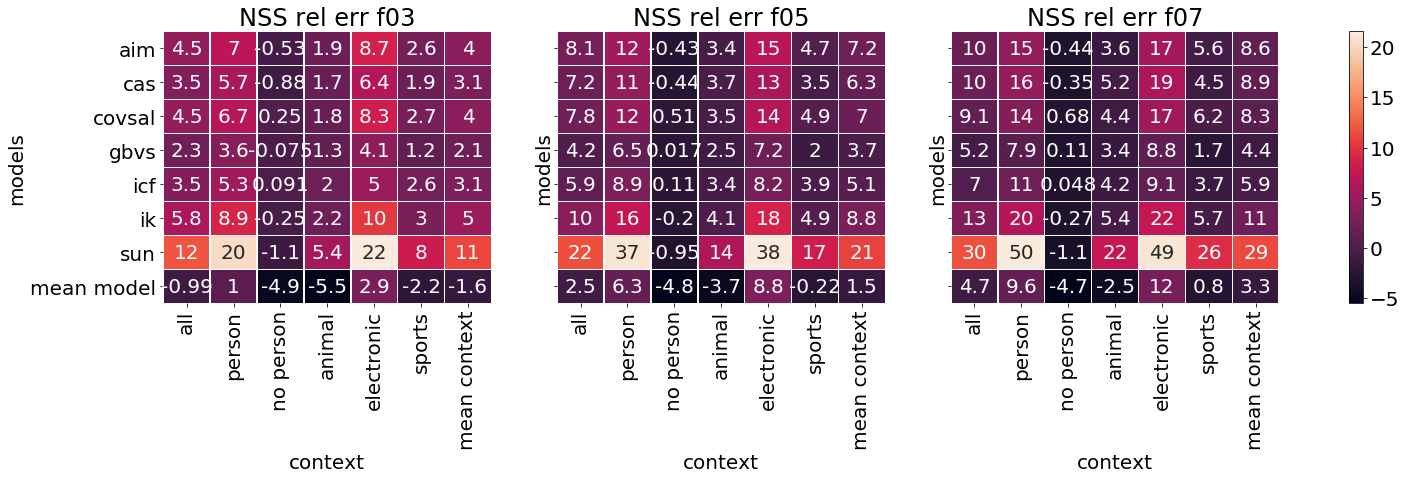

In [38]:
fig, ax = plt.subplots(1, 3,figsize=(25,5), sharex=True, sharey=True)

im = sns.heatmap(df_diff_f03, annot=True, linewidths=.5, ax=ax[0], cbar=False);
sns.heatmap(df_diff_f05, annot=True, linewidths=.5, ax=ax[1], cbar=False);
sns.heatmap(df_diff_f07, annot=True, linewidths=.5, ax=ax[2], cbar=False);

mappable = im.get_children()[0]
plt.colorbar(mappable, ax = ax);

ax[0].set_title('{} rel err f03'.format(plot_metric));
ax[1].set_title('{} rel err f05'.format(plot_metric));
ax[2].set_title('{} rel err f07'.format(plot_metric));

# plt.savefig(save_dir+'{}_sep_diff_with_mean.jpg'.format(plot_metric), bbox_inches='tight', pad_inches=0)

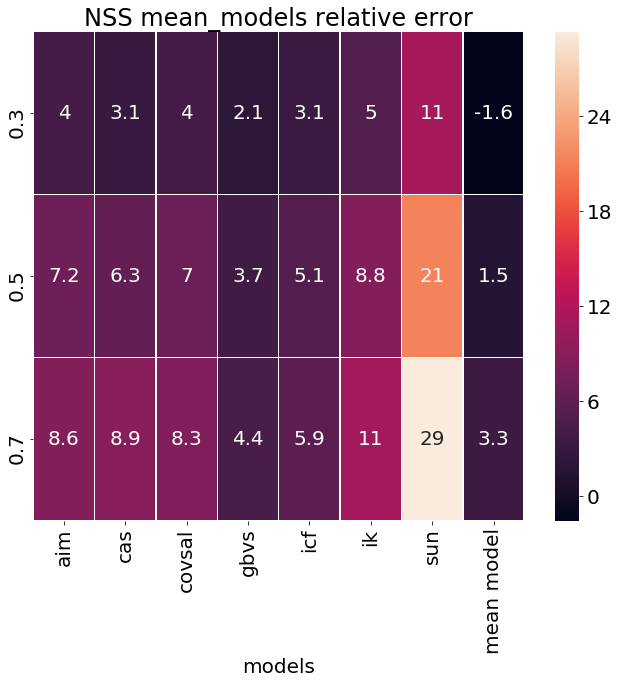

In [39]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(mean_context_diff.transpose(), annot=True, linewidths=.5, ax=ax);
plt.title('{} mean_models relative error'.format(plot_metric));
# plt.savefig(save_dir+'{}_mean_contexts_diff.jpg'.format(plot_metric), bbox_inches='tight', pad_inches=0)

### Bar Plot Vizualization for Different $\alpha$ Wace Weight

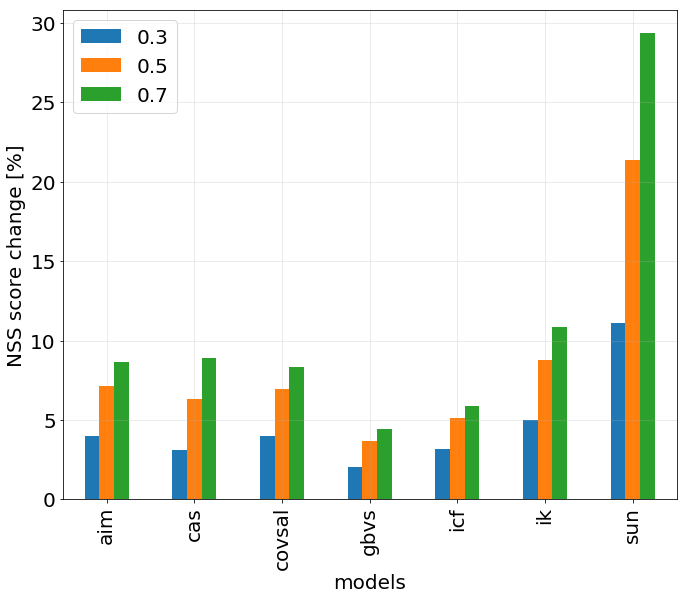

In [40]:
mean_context_diff = mean_context_diff.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]

matplotlib.rcParams.update({'font.size': 20})

fig, ax = plt.subplots(figsize=(11,9));
mean_context_diff.plot.bar(ax=ax);
# plt.title('Weight of face influence')
plt.ylabel('{} score change [%]'.format(plot_metric));
plt.grid(alpha=0.3)


plt.savefig(save_dir+'{}_improvment_mean_contexts.jpg'.format(plot_metric), bbox_inches='tight', pad_inches=0)

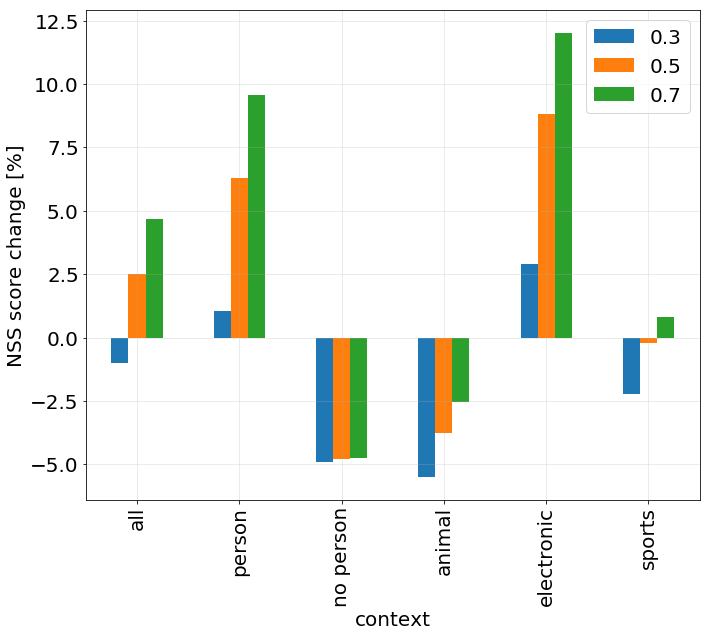

In [41]:
mean_models_diff = mean_models_diff.loc[['all', 'person', 'no person', 'animal', 'electronic', 'sports']]

matplotlib.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize=(11,9));
mean_models_diff.plot.bar(ax=ax);

plt.grid(alpha=0.3)
# plt.title('Weight of face influence')
plt.ylabel('{} score change [%]'.format(plot_metric));


plt.savefig(save_dir+'{}_improvment_mean_model.jpg'.format(plot_metric), bbox_inches='tight', pad_inches=0)

### Merge The Plots 

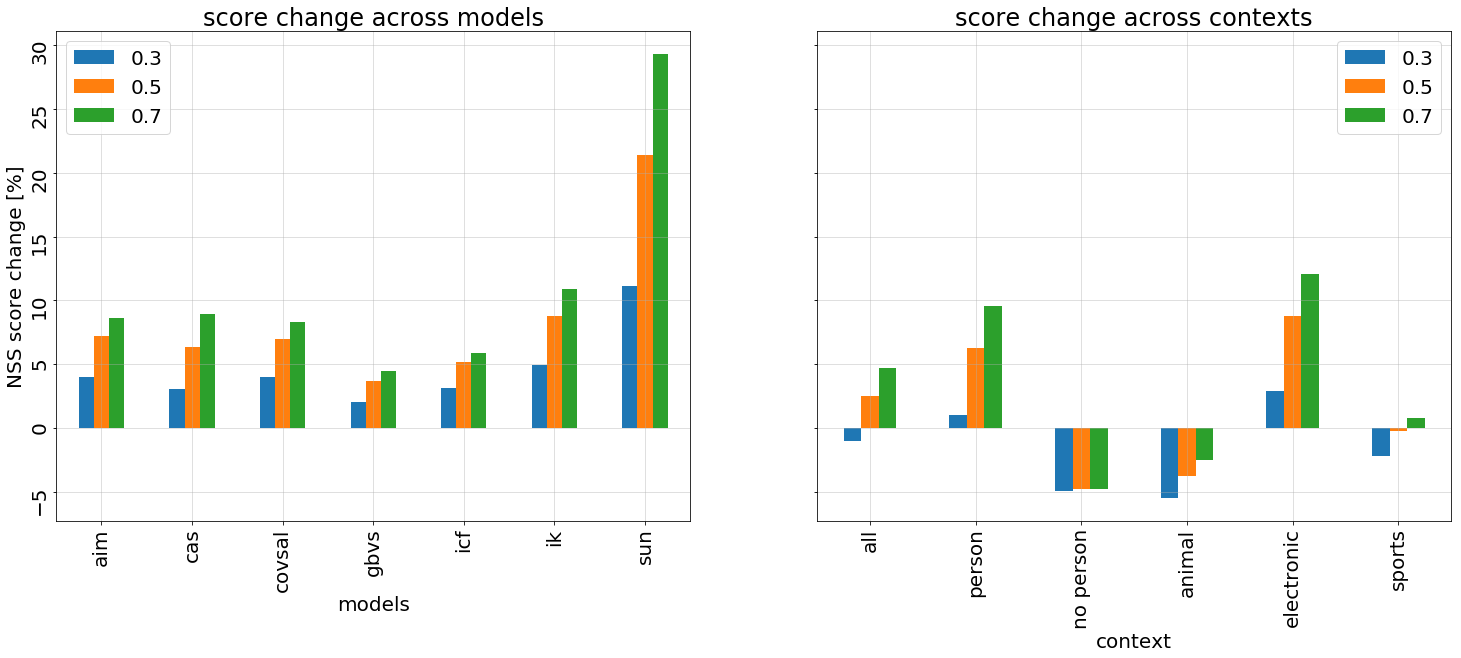

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(25,9), sharex=False, sharey=True)

mean_context_diff.plot.bar(ax=ax[0]);
mean_models_diff.plot.bar(ax=ax[1]);

mappable = im.get_children()[0]

ax[0].set_title('score change across models')
ax[1].set_title('score change across contexts')

ax[0].grid(alpha=0.5)
ax[1].grid(alpha=0.5)

ax[0].tick_params(labelrotation=90)
ax[1].tick_params(labelrotation=90)

ax[0].set_ylabel('{} score change [%]'.format(plot_metric));


plt.savefig(save_dir+'{}_improvements_mean_both.jpg'.format(plot_metric), bbox_inches='tight', pad_inches=0)

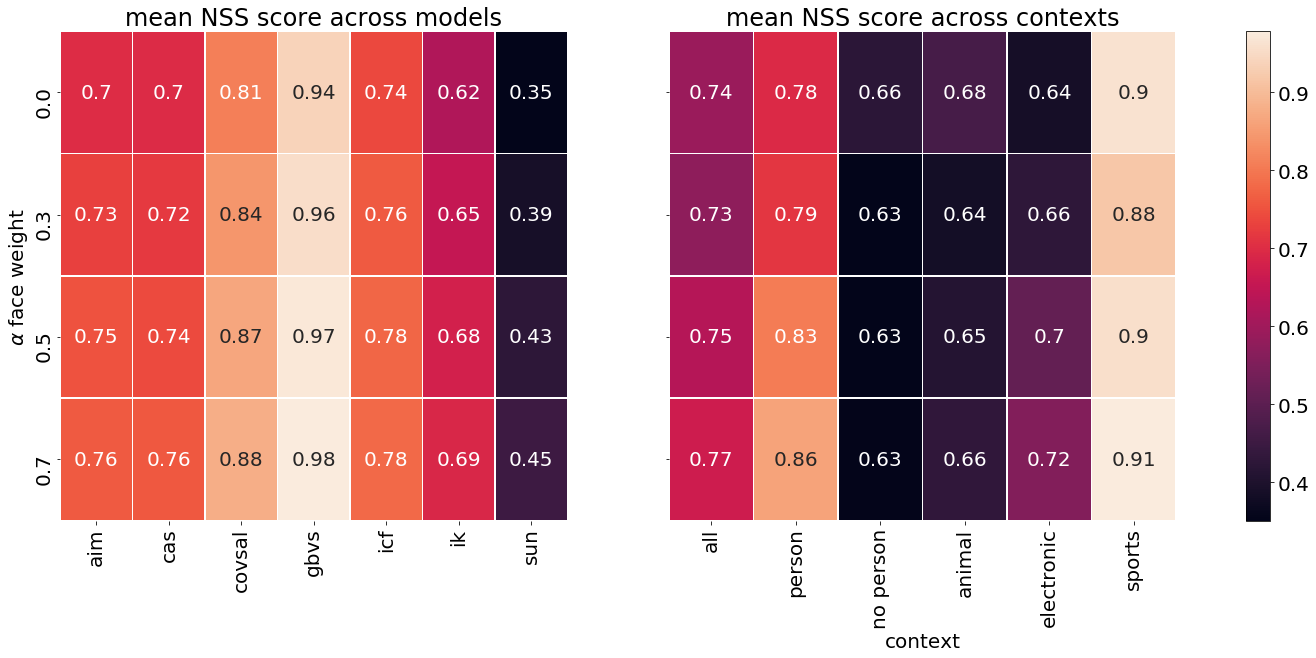

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(25,9), sharex=False, sharey=True)

im = sns.heatmap(mean_contexts.transpose(), annot=True, linewidths=.5, ax=ax[0], cbar=False);
sns.heatmap(mean_models.transpose(), annot=True, linewidths=.5, ax=ax[1], cbar=False);

mappable = im.get_children()[0]
plt.colorbar(mappable, ax = ax);

ax[0].set_title('mean NSS score across models'.format(plot_metric))
ax[1].set_title('mean NSS score across contexts'.format(plot_metric))

ax[0].tick_params(labelrotation=90)
ax[1].tick_params(labelrotation=90)

ax[0].set_ylabel(r'$\alpha$ face weight')

plt.savefig(save_dir+'NSS_performance_mean_both.jpg'.format(plot_metric), bbox_inches='tight', pad_inches=0)